In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
import re
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud


2024-04-21 16:56:19.237625: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 16:56:19.237700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 16:56:19.239349: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
resumeDataSet = pd.read_csv('../input/resume-dataset/UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [3]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [4]:
#See how one document look like
resumeDataSet["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [5]:
words = resumeDataSet["Resume"][0].split()

# Count the number of words
num_words = len(words)

# Print the number of words
print(f"Number of words in the first document: {num_words}")

Number of words in the first document: 670


In [6]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [7]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


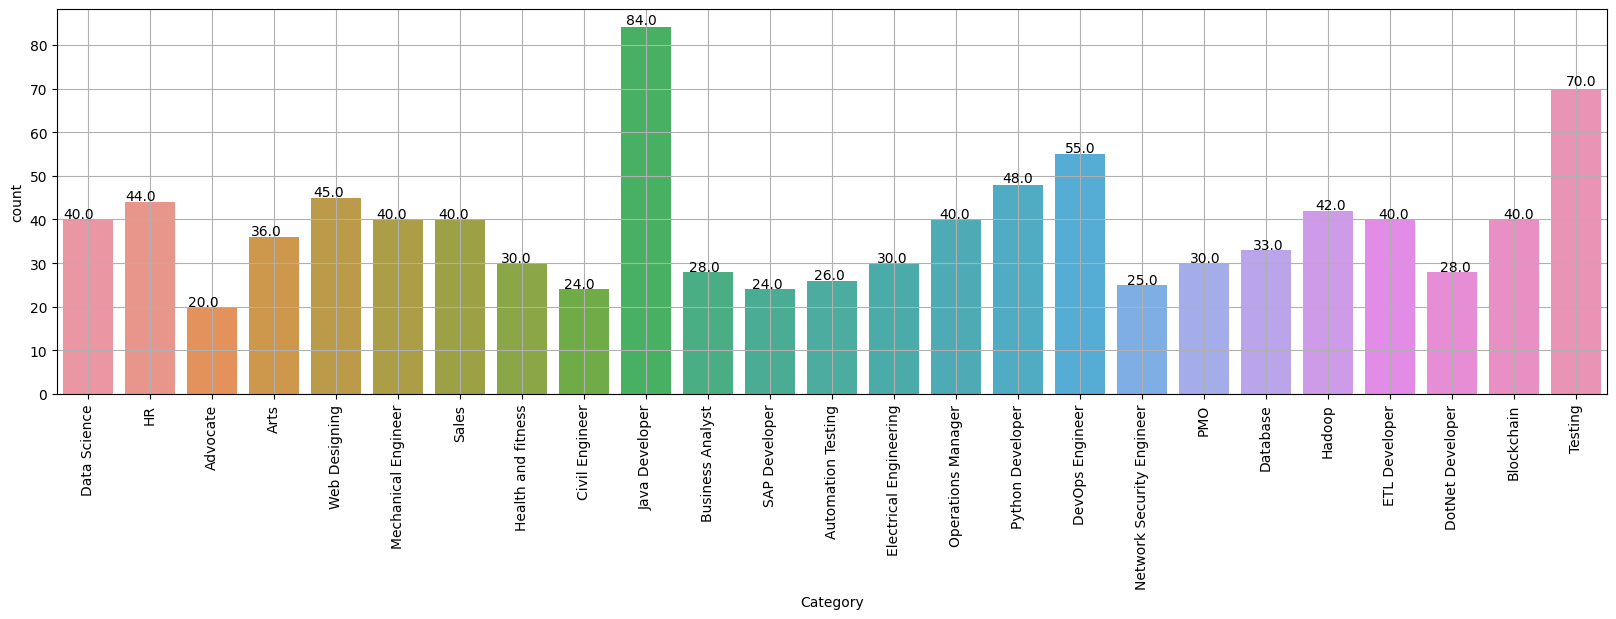

In [8]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

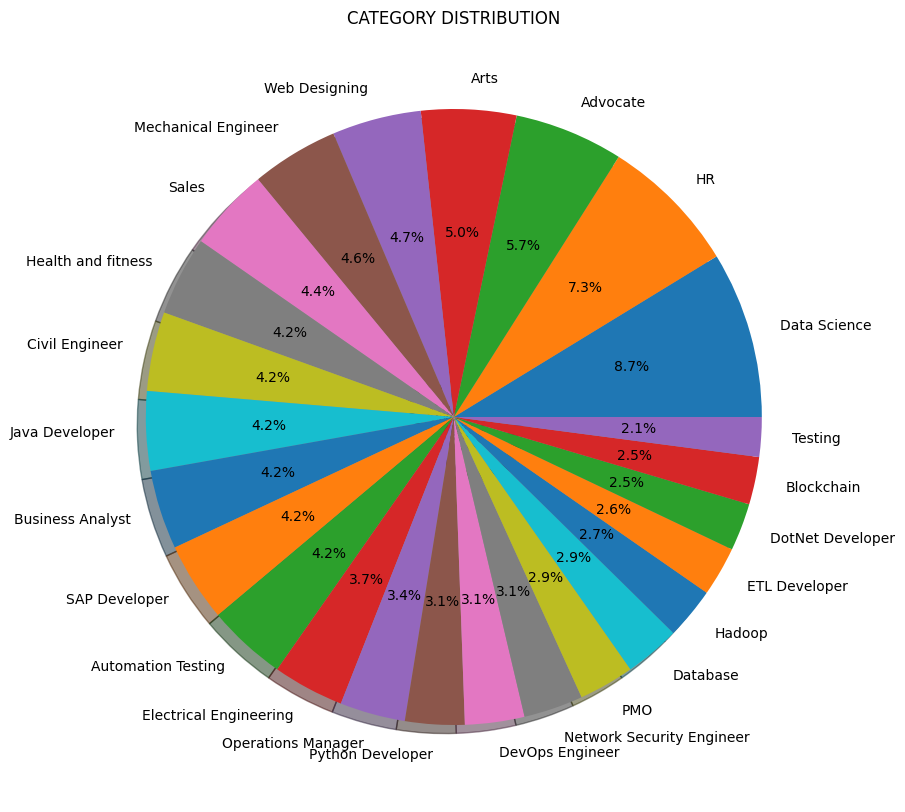

In [9]:
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [10]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [11]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [12]:
resumeDataSet['cleaned_resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [13]:
resumeDataSet_d=resumeDataSet.copy()

In [14]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)



[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


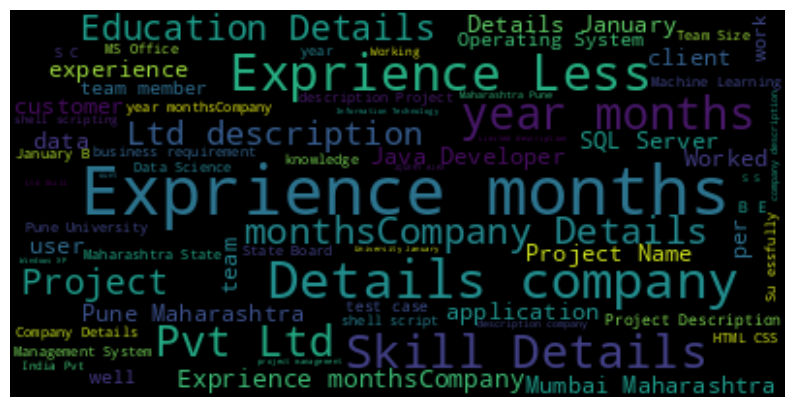

In [15]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [17]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [18]:
resumeDataSet.Category.value_counts()

Category
15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: count, dtype: int64

In [19]:
resumeDataSet_d.Category.value_counts() #understanding decode LabelEncoder

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [20]:
del resumeDataSet_d #clearing the space occupied 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True, # replaces tf value with 1+log(tf) why? to give less weight to words that appear in more in one document but less in the entire corpus
    stop_words='english') #remove the stop words
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget) #categories in train == categories in test
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 7351)
(193, 7351)


In [22]:
print(X_test) 
#(0,7294) >> document 0 , word number 7294 , its representaion by tfidf = 0.049572....

  (0, 7294)	0.04957214326166432
  (0, 7276)	0.08886293655556755
  (0, 7269)	0.032512576727289896
  (0, 7027)	0.0976567057848501
  (0, 7012)	0.0976567057848501
  (0, 6975)	0.08230652271798111
  (0, 6969)	0.043931064774192306
  (0, 6931)	0.0969657574527968
  (0, 6930)	0.02627278731765583
  (0, 6923)	0.10657793202067362
  (0, 6921)	0.08479354718671865
  (0, 6832)	0.05425343219543948
  (0, 6829)	0.0830706288418438
  (0, 6776)	0.06995052791839437
  (0, 6720)	0.05394873722865111
  (0, 6670)	0.16534717606239105
  (0, 6614)	0.06353201393265383
  (0, 6609)	0.04435825334984692
  (0, 6601)	0.07197814123005761
  (0, 6563)	0.03199866345329793
  (0, 6478)	0.14680987313061153
  (0, 6375)	0.08006916732628501
  (0, 6298)	0.0815045663995942
  (0, 6239)	0.09731104393871097
  (0, 6225)	0.08479354718671865
  :	:
  (192, 1642)	0.06482365689442747
  (192, 1601)	0.09475056366682999
  (192, 1590)	0.09139885642141701
  (192, 1480)	0.10365578957743025
  (192, 1476)	0.09475056366682999
  (192, 1408)	0.03505212356

In [23]:
# Convert the sparse tensor to a dense tensor and reshape
X_train_dense = X_train.toarray()
X_train_reshaped = np.reshape(X_train_dense, (X_train_dense.shape[0], 1, X_train_dense.shape[1]))

In [24]:
X_train_reshaped.shape

(769, 1, 7351)

In [25]:
# Convert the dense tensor to a numpy array and reshape
X_test_dense = X_test.toarray()
X_test_reshaped = np.reshape(X_test_dense, (X_test_dense.shape[0], 1, X_test_dense.shape[1]))

In [26]:
# Define the number of hidden units and output classes
n_hidden = 64
n_classes = 25  # becase there is 25 categories in the resume dataset

# Define a sequential model
model = Sequential()
# Add an LSTM layer with n_hidden units
model.add(LSTM(n_hidden, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
# Add a dense layer with n_classes units
model.add(Dense(n_classes))
# Add an activation layer with softmax function
model.add(Activation('softmax'))

In [27]:
# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [28]:
# Train the model and capture the history
history = model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), batch_size=32, epochs=10)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4720 - loss: 3.1843 - val_accuracy: 0.9067 - val_loss: 3.0384
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9722 - loss: 2.9500 - val_accuracy: 0.9482 - val_loss: 2.6904
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9890 - loss: 2.5450 - val_accuracy: 0.9896 - val_loss: 2.1300
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9958 - loss: 1.9300 - val_accuracy: 0.9948 - val_loss: 1.4673
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 1.2633 - val_accuracy: 1.0000 - val_loss: 0.9300
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 0.7471 - val_accuracy: 0.9948 - val_loss: 0.5968
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 0.4739 - val_accuracy: 0.9948 - val_loss: 0.4060
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.2929 - val_accuracy: 0.9948 - v

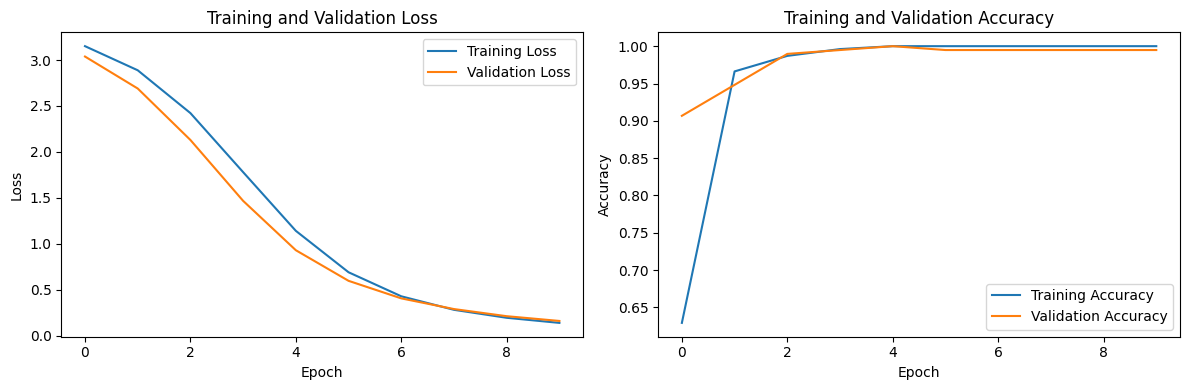

In [29]:
# Get training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [30]:
# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_reshaped, y_train)
print(f'Training Accuracy: {train_accuracy}')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {test_accuracy}')


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.1141
Training Accuracy: 1.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.1658 
Test Accuracy: 0.9948186278343201


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


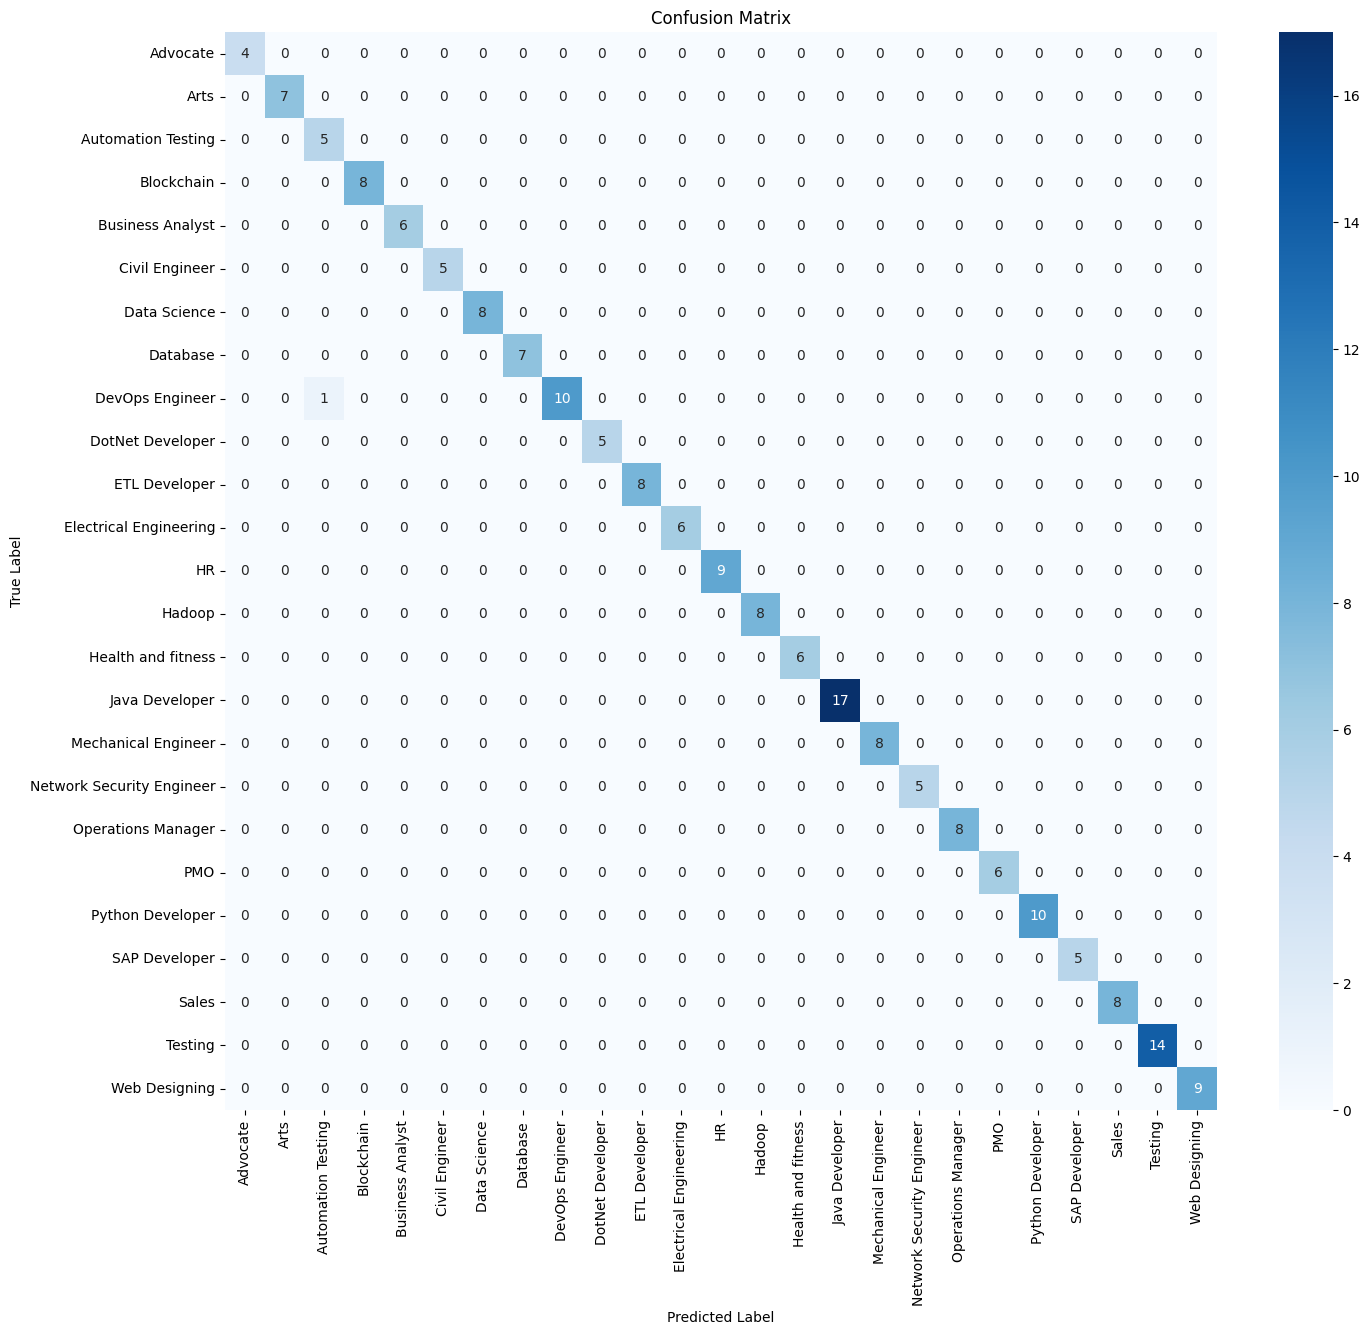

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the probabilities for the test set
y_pred_prob = model.predict(X_test_reshaped)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Map the index to the corresponding category string using the label encoder
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_,
            cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [32]:
# Assuming `model` and `word_vectorizer` are already trained and available
new_resume_text = cleanResume("machine learning , python , AI")
new_resume_features = word_vectorizer.transform([new_resume_text])
new_resume_dense = new_resume_features.toarray()
new_resume_reshaped = np.reshape(new_resume_dense, (1, 1, new_resume_dense.shape[1]))

predicted_category = model.predict(new_resume_reshaped)

# Get the index of the maximum probability
predicted_index = np.argmax(predicted_category) #output is probability for 25 categories
print(predicted_index)# take maximum probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6


In [33]:
# Map the index to the corresponding category string using the label encoder
predicted_category_string = le.inverse_transform([predicted_index])[0]

print(predicted_category_string)


Data Science
